# 短期第二次实习

读取数据场文件，对1979-2016 JJA亚澳季风区（200S-400N；300E-1800E）850hPa位势高度场进行自然正交展开，输出EOF第一模态和第二模态的空间场和时间序列。

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator
from eofs.standard import Eof

## 读取数据

In [2]:
# ds = xr.open_dataset(r'D:\work\python\short_climate\hgt.mon.mean.nc')['hgt']
ds = xr.open_dataset(r'E:\Work\Python\short_climate\exp2\hgt.mon.mean.nc')['hgt']
ds

<xarray.DataArray 'hgt' (time: 513, level: 17, lat: 73, lon: 144)>
[91675152 values with dtype=float32]
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-09-01
Attributes:
    long_name:      Monthly Geopotential Heights on Pressure Levels
    units:          m
    precision:      0
    GRIB_id:        7
    GRIB_name:      HGT
    var_desc:       Geopotential height
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  geopotential_height
    cell_methods:   time: mean (montly from 6-hourly values)
    valid_range:    [-1500. 35800.]
    actual_range:   [ -347. 32301.]

In [3]:
data = ds.loc[ds.time.dt.month.isin([6,7,8])].loc['1979-06-01':'2016-08-01', 850, 40:-20, 30:180]
data = data.groupby(data.time.dt.year).mean('time')
data

<xarray.DataArray 'hgt' (year: 38, lat: 25, lon: 61)>
array([[[1503.3334, 1497.    , 1489.3334, ..., 1540.6666, 1548.    ,
         1554.    ],
        [1498.    , 1491.6666, 1485.    , ..., 1556.3334, 1562.6666,
         1567.    ],
        [1499.3334, 1492.6666, 1487.6666, ..., 1566.    , 1570.    ,
         1574.    ],
        ...,
        [1557.3334, 1562.3334, 1565.    , ..., 1520.    , 1520.3334,
         1521.    ],
        [1564.6666, 1568.    , 1569.3334, ..., 1521.3334, 1521.6666,
         1522.6666],
        [1572.    , 1573.6666, 1573.3334, ..., 1520.    , 1520.3334,
         1521.3334]],

       [[1495.3334, 1491.    , 1485.6666, ..., 1517.    , 1524.3334,
         1532.    ],
        [1492.3334, 1487.    , 1481.    , ..., 1534.3334, 1540.6666,
         1548.3334],
        [1494.3334, 1489.3334, 1484.    , ..., 1548.3334, 1553.3334,
         1559.3334],
...
        [1553.6666, 1559.    , 1562.6666, ..., 1521.6666, 1521.3334,
         1521.6666],
        [1559.6666, 1564.3334, 1566.6666, ..., 1525.3334, 1525.6666,
         1526.3334],
        [1566.    , 1569.    , 1569.6666, ..., 1528.    , 1528.    ,
         1528.    ]],

       [[1507.6666, 1502.3334, 1496.6666, ..., 1541.3334, 1545.6666,
         1551.3334],
        [1498.6666, 1494.6666, 1489.6666, ..., 1553.    , 1558.6666,
         1564.6666],
        [1497.3334, 1494.    , 1490.3334, ..., 1560.6666, 1566.3334,
         1572.3334],
        ...,
        [1561.    , 1565.3334, 1568.6666, ..., 1520.3334, 1521.6666,
         1522.6666],
        [1568.6666, 1572.    , 1573.6666, ..., 1523.6666, 1525.    ,
         1526.    ],
        [1576.6666, 1578.3334, 1577.6666, ..., 1525.3334, 1526.3334,
         1527.    ]]], dtype=float32)
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 40.0 37.5 35.0 32.5 30.0 ... -12.5 -15.0 -17.5 -20.0
  * lon      (lon) float32 30.0 32.5 35.0 37.5 40.0 ... 172.5 175.0 177.5 180.0
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2012 2013 2014 2015 2016

## EOF正交分解-数据处理

In [4]:
eofdata = Eof(np.array(data))
eof_time = eofdata.pcs(pcscaling=1, npcs=2)
eof_vars = eofdata.eofs(eofscaling=0, neofs=2)
eof_space = eofdata.eofsAsCorrelation(neofs=2)
eof_s1 = eofdata.varianceFraction(neigs=1)
eof_s2 = eofdata.varianceFraction(neigs=2)

In [5]:
eof_time

array([[-1.5634757 ,  0.07376511],
       [-1.224854  , -0.07571068],
       [ 0.7784287 , -0.18800074],
       [-0.42930058, -1.0165492 ],
       [-1.3497611 , -0.01416038],
       [ 1.785056  , -0.57181966],
       [ 0.5887041 , -0.8094481 ],
       [ 0.9104065 , -1.3801852 ],
       [-1.7197292 , -0.70097965],
       [-0.10521292,  1.2104366 ],
       [-0.18192312,  0.42833355],
       [ 0.37716174, -0.6417549 ],
       [ 0.3290026 , -1.0503819 ],
       [-0.4908305 , -0.01432126],
       [-1.1169811 , -0.99497277],
       [ 1.1831589 ,  0.13270588],
       [ 0.14463572,  0.4185814 ],
       [-0.11419309,  0.62284434],
       [-1.0135423 , -1.5045646 ],
       [-1.5861311 ,  2.2196324 ],
       [ 0.15570408,  0.71214926],
       [ 1.1451224 ,  0.7045367 ],
       [ 1.3586309 , -0.46098226],
       [-0.05403249, -1.2099621 ],
       [-0.27808395,  1.0985438 ],
       [-0.16156636, -1.0159552 ],
       [-0.06140544, -0.0340497 ],
       [-0.22836266,  0.06624586],
       [ 1.4682307 ,

In [6]:
print(eof_space.max(), eof_space.min())

0.7913769 -0.8876875


In [7]:
print(eof_s1, eof_s2)

[0.29459605] [0.29459605 0.23769557]


## 绘图

In [8]:
def drawmap():
    proj = ccrs.PlateCarree()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.subplots(1, 1, subplot_kw={'projection': proj})
    # 海岸线
    ax.coastlines('110m')
    # 标注坐标轴
    majorticks = MultipleLocator(30)
    ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
                 linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
    return ax, fig

In [9]:
def drawpaper():  # 设置坐标轴样式，画图基本设置
    fig = plt.figure(figsize=(9, 6))
    ax = fig.subplots(1, 1)
    ax.set_xlabel('Time')
    return ax, fig

In [10]:
lon = data['lon'].data
lat = data['lat'].data

### 第一模态

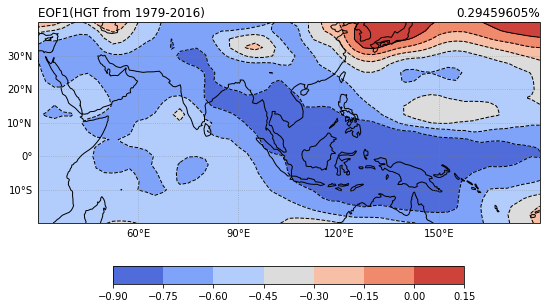

In [11]:
ax1, fig1 = drawmap()
line = ax1.contour(lon, lat, eof_space[0,:, :], colors='k', linewidths=1, transform=ccrs.PlateCarree())
# ax1.clabel(line, inline=False, fontsize=10, fmt='%.1f')
shaded = ax1.contourf(lon, lat, eof_space[0,:,:], cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig1.colorbar(shaded, extendrect='True', pad=0.03, fraction=0.1, shrink=0.7, location='bottom', panchor=(0.4, 0.4))
ax1.set_title('EOF1(HGT from 1979-2016)', loc='left')
ax1.set_title(str(eof_s2[0])+'%', loc='right')
plt.savefig(r'E:\Work\Python\short_climate\exp2\EOF1(HGT from 1979-2016)')
plt.show()

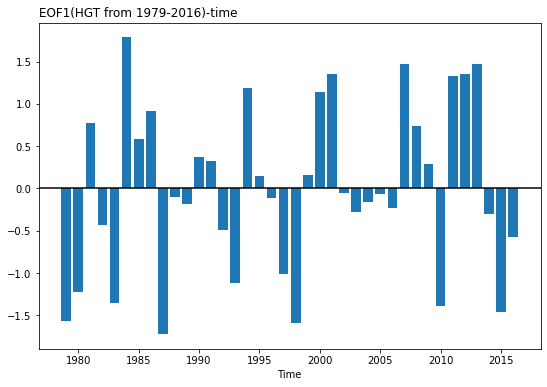

In [12]:
ax3, fig3 = drawpaper()
ax3.bar(data['year'], eof_time[:,0])
ax3.set_title('EOF1(HGT from 1979-2016)-time', loc='left')
ax3.axhline(y=0, linestyle='-', color='k')
plt.savefig(r'E:\Work\Python\short_climate\exp2\EOF1(HGT from 1979-2016)-time')
plt.show()

### 第二模态

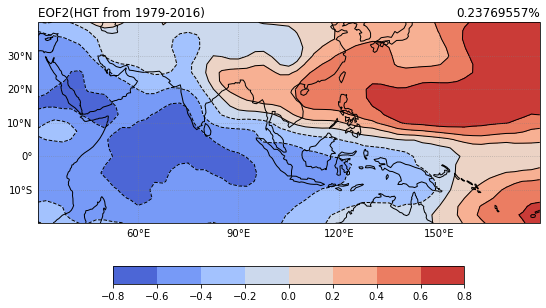

In [13]:
ax2, fig2 = drawmap()
line = ax2.contour(lon, lat, eof_space[1,:, :], colors='k', linewidths=1, transform=ccrs.PlateCarree())
# ax2.clabel(line, inline=False, fontsize=10, fmt='%.1f')
shaded = ax2.contourf(lon, lat, eof_space[1,:,:], cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig2.colorbar(shaded, extendrect='True', pad=0.03, fraction=0.1, shrink=0.7, location='bottom', panchor=(0.4, 0.4))
ax2.set_title('EOF2(HGT from 1979-2016)', loc='left')
ax2.set_title(str(eof_s2[1])+'%', loc='right')
plt.savefig(r'E:\Work\Python\short_climate\exp2\EOF2(HGT from 1979-2016)')
plt.show()

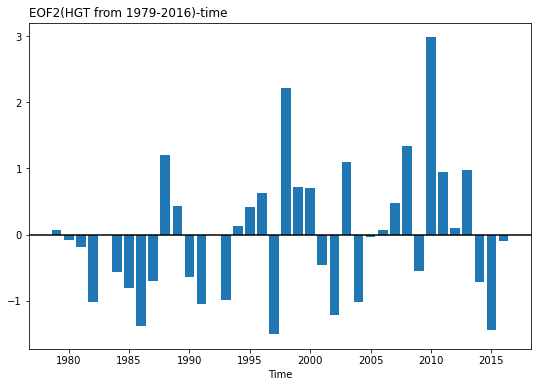

In [14]:
ax4, fig4 = drawpaper()
ax4.bar(data['year'], eof_time[:,1])
ax4.set_title('EOF2(HGT from 1979-2016)-time', loc='left')
ax4.axhline(y=0, linestyle='-', color='k')
plt.savefig(r'E:\Work\Python\short_climate\exp2\EOF2(HGT from 1979-2016)-time')
plt.show()